# Weather Play Golf Dataset

## Show the Dataset

In [1]:
import pandas as pd, numpy as np
df = pd.read_csv('weather_nominal.csv')
df

,Outlook,Temperature,Humidity,Windy,Play golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


The above dataset shows 14 rows sampled in the past. Each row has 5 columns where the first 4 columns are the attributes that may or may not contribute to the variabl of whether to play golf or not, which is indicated in the last column.

## Describe the Dataset

In [2]:
df.describe()

,Outlook,Temperature,Humidity,Windy,Play golf
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,Normal,False,Yes
freq,5,6,7,8,9


The description shows that the last column Play golf has the top possibility of Yes with frequency of 9 out of 14. If we make prediction purely using this column, base on the observed Yes of 9/14 = 64% > 50%, we may simply predict Yes in general.

By gaining more information, we can achieve a prediction better than 64%. For example, the dataset shows a decision of Yes to Play golf given Outlook is Overcast is 5/5 or 100%. Similarly the data set shows a decision of Yes given Humidity is Normal is 6/7 or 85%. In this case it seems both **Outlook=Overcast** and **Humidity=Normal** are good splitter meaning that they can split the data into 2 partitions with lower variability.

## Low Variability Measurement 1: Low Entropy, High Information Gain

Entropy measures how mixed the data is
\begin{align}
Entropy(Y) = -\sum(P(Y)\ln(P(Y))
\end{align}

After X happened, Entroppy becomes
\begin{align}
Entropy(Y|X) = -\sum(P(X)Entropy(Y|X))
\end{align}

Information Gain is the change from the time before X happened and the time after X happened.
\begin{align}
Information(Y|X) = Entropy(Y) - Entropy(Y|X)
\end{align}

In [3]:
def export_graphviz_catgorical(clf, **kwargs):
    from sklearn import tree
    from io import StringIO
    dotfile = StringIO()
    tree.export_graphviz(clf, out_file=dotfile, **kwargs)
    dot_data = dotfile.getvalue()
    return dot_data

In [4]:
def display_clf(clf):
    import pydotplus
    dot_data = export_graphviz_catgorical(clf, feature_names=train.get_train_x_names(), class_names=train.get_train_y_names(), filled=True, rounded=True)
    from IPython.display import Image, display
    graph = pydotplus.graph_from_dot_data(dot_data)
    display(Image(graph.create_png()))
    graph.write_png(clf.criterion+'.png')

In [5]:
from sklearn import preprocessing
class TrainModel:
    def __init__(self, clf, df_raw, target):
        self.clf = clf
        self.encoders = {}
        self.df = self.transform(df_raw)
        self.target = target
    def transform(self, df_raw):
        df = df_raw.copy()
        for c in df:
            if (df[c].dtype=='object'):
                le = preprocessing.LabelEncoder()
                le.fit(df[c].tolist())
                result = le.transform(df[c].tolist())
                df[c] = result
                self.encoders[c] = le
        return df
    def get_train_x(self):
        return self.df[[x for x in self.df.columns if x!=self.target]]
    def get_train_y(self):
        return self.df[[self.target]].iloc[:,0].values
    def get_train_x_names(self):
        return [x for x in self.df.columns if x!=self.target]
    def get_train_y_names(self):
        return list(self.encoders[self.target].classes_)
    def run(self):
        self.clf.fit(self.get_train_x(), self.get_train_y())
    def predict(self):
        print('trained y', self.get_train_y())
        print('predict y', self.clf.predict(self.get_train_x()))
    def visualize(self):
        display_clf(clf)

trained y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
predict y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


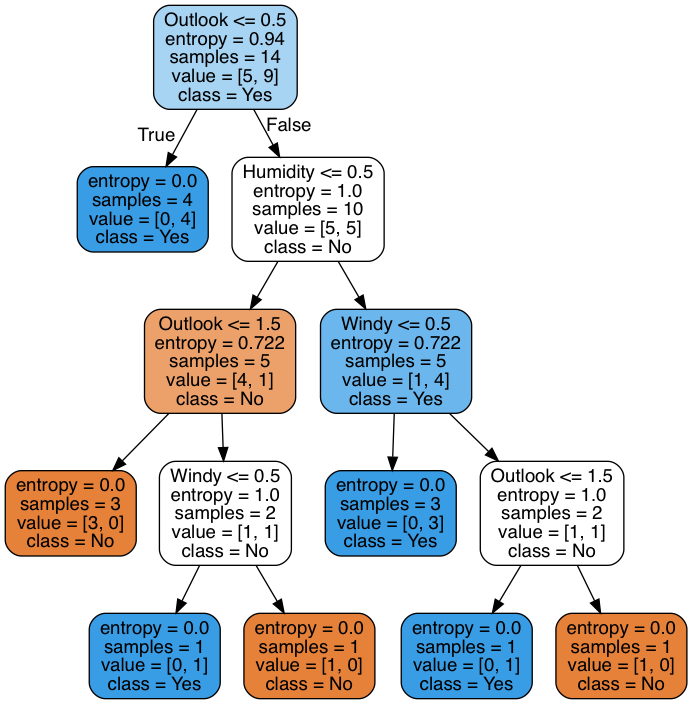

In [6]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
train = TrainModel(clf, df, target=df.columns[-1])
train.run()
train.predict()
train.visualize()

The first root node has an entropy 0.94 calculated in this way.
\begin{align}
Entropy(Play) = -P(No)lnP(No)-P(Yes)lnP(Yes) = -\frac{5}{14}ln\frac{5}{14}-\frac{9}{14}ln\frac{9}{14} = 0.94
\end{align}

## Low Variability Measurement 2: Low Gini Index

trained y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
predict y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


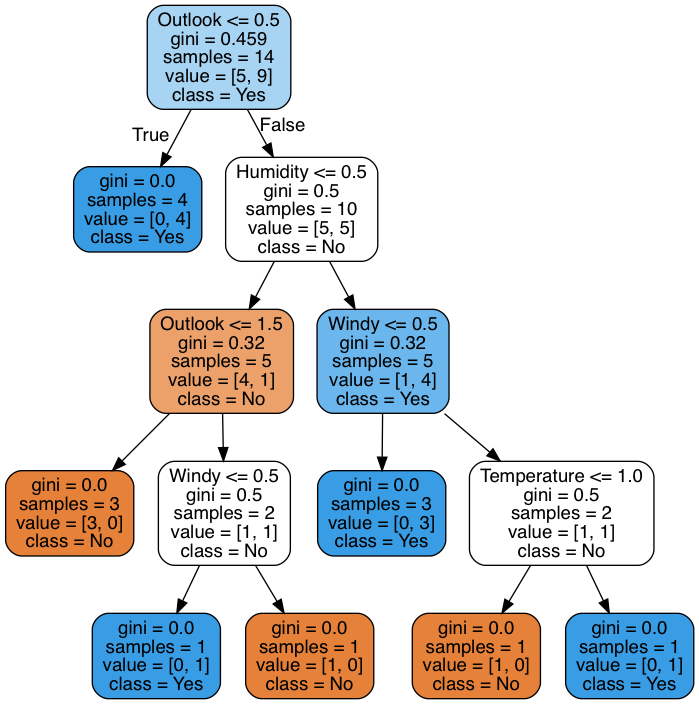

In [7]:
clf = tree.DecisionTreeClassifier(criterion='gini')
train = TrainModel(clf, df, target=df.columns[-1])
train.run()
train.predict()
train.visualize()

Gini Index Formula:
\begin{align}
GiniIndex = 1-\sum{P^2}
\end{align}

Gini Index of 0.459 at root node is calculated as:
\begin{align}
GiniIndex = 1-P(No)^2-P(Yes)^2 = 1-(\frac{5}{14})^2-(\frac{9}{14})^2 = 0.459
\end{align}

## Linear Regression

In [8]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
train = TrainModel(clf, df, target=df.columns[-1])
train.run()
train.predict()

trained y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
predict y [0.44342746 0.1540409  0.69483934 0.38305745 0.6292113  0.33982473
 0.84264849 0.63446933 0.88062317 1.01129503 0.97332035 0.59649464
 1.32307692 0.09367089]


## Logistic Regression

In [9]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
train = TrainModel(clf, df, target=df.columns[-1])
train.run()
train.predict()

trained y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
predict y [1 0 1 0 1 1 1 1 1 1 1 1 1 0]


## Support Vector Machine

In [10]:
from sklearn import svm
clf = svm.SVC()
train = TrainModel(clf, df, target=df.columns[-1])
train.run()
train.predict()

trained y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
predict y [1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Naive Bayes

### Gaussian

In [11]:
from sklearn import naive_bayes
clf = naive_bayes.GaussianNB()
train = TrainModel(clf, df, target=df.columns[-1])
train.run()
train.predict()

trained y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
predict y [0 0 1 0 1 1 1 0 1 1 1 1 1 0]


### Bernoulli

In [12]:
from sklearn import naive_bayes
clf = naive_bayes.BernoulliNB()
train = TrainModel(clf, df, target=df.columns[-1])
train.run()
train.predict()

trained y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
predict y [0 0 1 0 1 1 1 0 1 1 1 1 1 0]


### MultinomialNB

In [13]:
from sklearn import naive_bayes
clf = naive_bayes.MultinomialNB()
train = TrainModel(clf, df, target=df.columns[-1])
train.run()
train.predict()

trained y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
predict y [1 0 1 1 1 1 1 1 1 1 1 1 1 0]


## K Nearest Neighbors

In [14]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
train = TrainModel(clf, df, target=df.columns[-1])
train.run()
train.predict()

trained y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
predict y [0 0 0 0 0 0 1 0 1 1 1 1 1 0]


## Random Forest

In [15]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier()
train = TrainModel(clf, df, target=df.columns[-1])
train.run()
train.predict()

trained y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
predict y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


## K Means Clustering

In [16]:
from sklearn import cluster
clf = cluster.KMeans(n_clusters=3, random_state=0)
train = TrainModel(clf, df, target=df.columns[-1])
train.run()
train.predict()

trained y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
predict y [0 0 0 1 2 2 0 1 2 1 1 0 0 1]


## Principle Component Analysis and Factor Analysis TBD

## Gradient Boosting

In [20]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=1, random_state=0)
train = TrainModel(clf, df, target=df.columns[-1])
train.run()
train.predict()

trained y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
predict y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


## Extreme Gradient Boosting

In [22]:
from xgboost import XGBClassifier
clf = XGBClassifier()
train = TrainModel(clf, df, target=df.columns[-1])
train.run()
train.predict()

trained y [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
predict y [0 0 0 1 1 1 1 1 1 1 1 0 1 0]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Light Gradient Boosting

In [25]:
import lightgbm